## Importing Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/Glass Identification.csv', header=None)
column_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca','Ba', 'Fe', 'Type of Glass']
df.columns = column_names

In [3]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Dropping the Id Number column and Converting the Classification problem to Binary Classification

Since Id number column is just a representation of the number of instances present, it is of no use to us.

Let us convert the dataset into 2 classes - Window Glass and Non-Window Glass. (Classes 1-4 are Window Glasses whereas Classes 5-7 are Non-Window Glasses)

In [4]:
df['Type of Glass'] = df['Type of Glass'].map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})

In [5]:
df.drop('Id number', axis=1, inplace=True)

In [6]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


## Checking for Null values

No column seems to be null and since no column datatype is Object, we do not need to suspect the posibility of empty strings in the columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## Splitting into train and test sets

It is always a good idea to split the data prior to any visulizations as our mind is prone to being biased. So we will devise a method/algorithm which will work the best for the Test Data as we have seen it.

This would cause our model to perform poorly on the real world data as we have not seen it.

So keeping the test data aside is always beneficial as it will give you the true measure of you model on the real world data.

We will use stratify splitting to ensure that the ratio of the output classes to the total number of instances in the test set and train set remain constant.

Why does it help ? If we split our dataset randomly it might happen that instances belonging to class 0 might not be present in the train set, they might all go to the test set. Or it might happen that there are lesser number of instances belonging to Class 1 in the training data and more in the testing data. This can ususally cause the model to generalize poorly on that particular class as it has not seen enough data belonging to that class.

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42, stratify= df['Type of Glass'])

In [9]:
train.value_counts('Type of Glass') / len(train)

Type of Glass
0    0.760234
1    0.239766
Name: count, dtype: float64

In [10]:
test.value_counts('Type of Glass') / len(test)

Type of Glass
0    0.767442
1    0.232558
Name: count, dtype: float64

In [11]:
train.shape

(171, 10)

In [12]:
test.shape

(43, 10)

Now you would be wondering why did we not get rid of the outliers before splitting the data ?

The answer is - Outliers are present in the real world data. Hence it is ok to remove outliers from your training data to make your model more robust but not from your testing data.

If you get rid of outliers from your testing data, then again when you deploy your model and test on the real world data, it won't perform well. Ofcourse it give you a nice accuracy on your Test Data which might get you to think that your model is working Great ! But it won't work when to deploy the model and get the accuracy on the Real World Data.

## Visualizations and Descriptions

In [13]:
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.00000,171.000000,171.000000,171.000000,171.000000
mean,1.518131,13.404795,2.722982,1.459298,72.682164,0.52731,8.868538,0.156901,0.054737,0.239766
std,0.002748,0.825564,1.420722,0.503201,0.742255,0.71419,1.356868,0.452056,0.095955,0.428195
min,1.511150,11.020000,0.000000,0.340000,69.890000,0.00000,5.430000,0.000000,0.000000,0.000000
25%,1.516490,12.885000,2.220000,1.190000,72.335000,0.14500,8.215000,0.000000,0.000000,0.000000
50%,1.517630,13.270000,3.480000,1.360000,72.790000,0.56000,8.590000,0.000000,0.000000,0.000000
75%,1.519050,13.785000,3.605000,1.630000,73.095000,0.61000,9.135000,0.000000,0.090000,0.000000
max,1.527770,17.380000,4.490000,3.500000,75.410000,6.21000,14.960000,2.880000,0.510000,1.000000


1.) For RI there doesn't seems to be any extreme skewness present, slightly skewed

2.) For Na, Al, Ca, Ba, Fe  the data seems to be skewed to the right. (Mean > Median)

3.) For Mg, Si, K the data seems to be skewed to the left. (Mean < Median)



Univariate Analysis

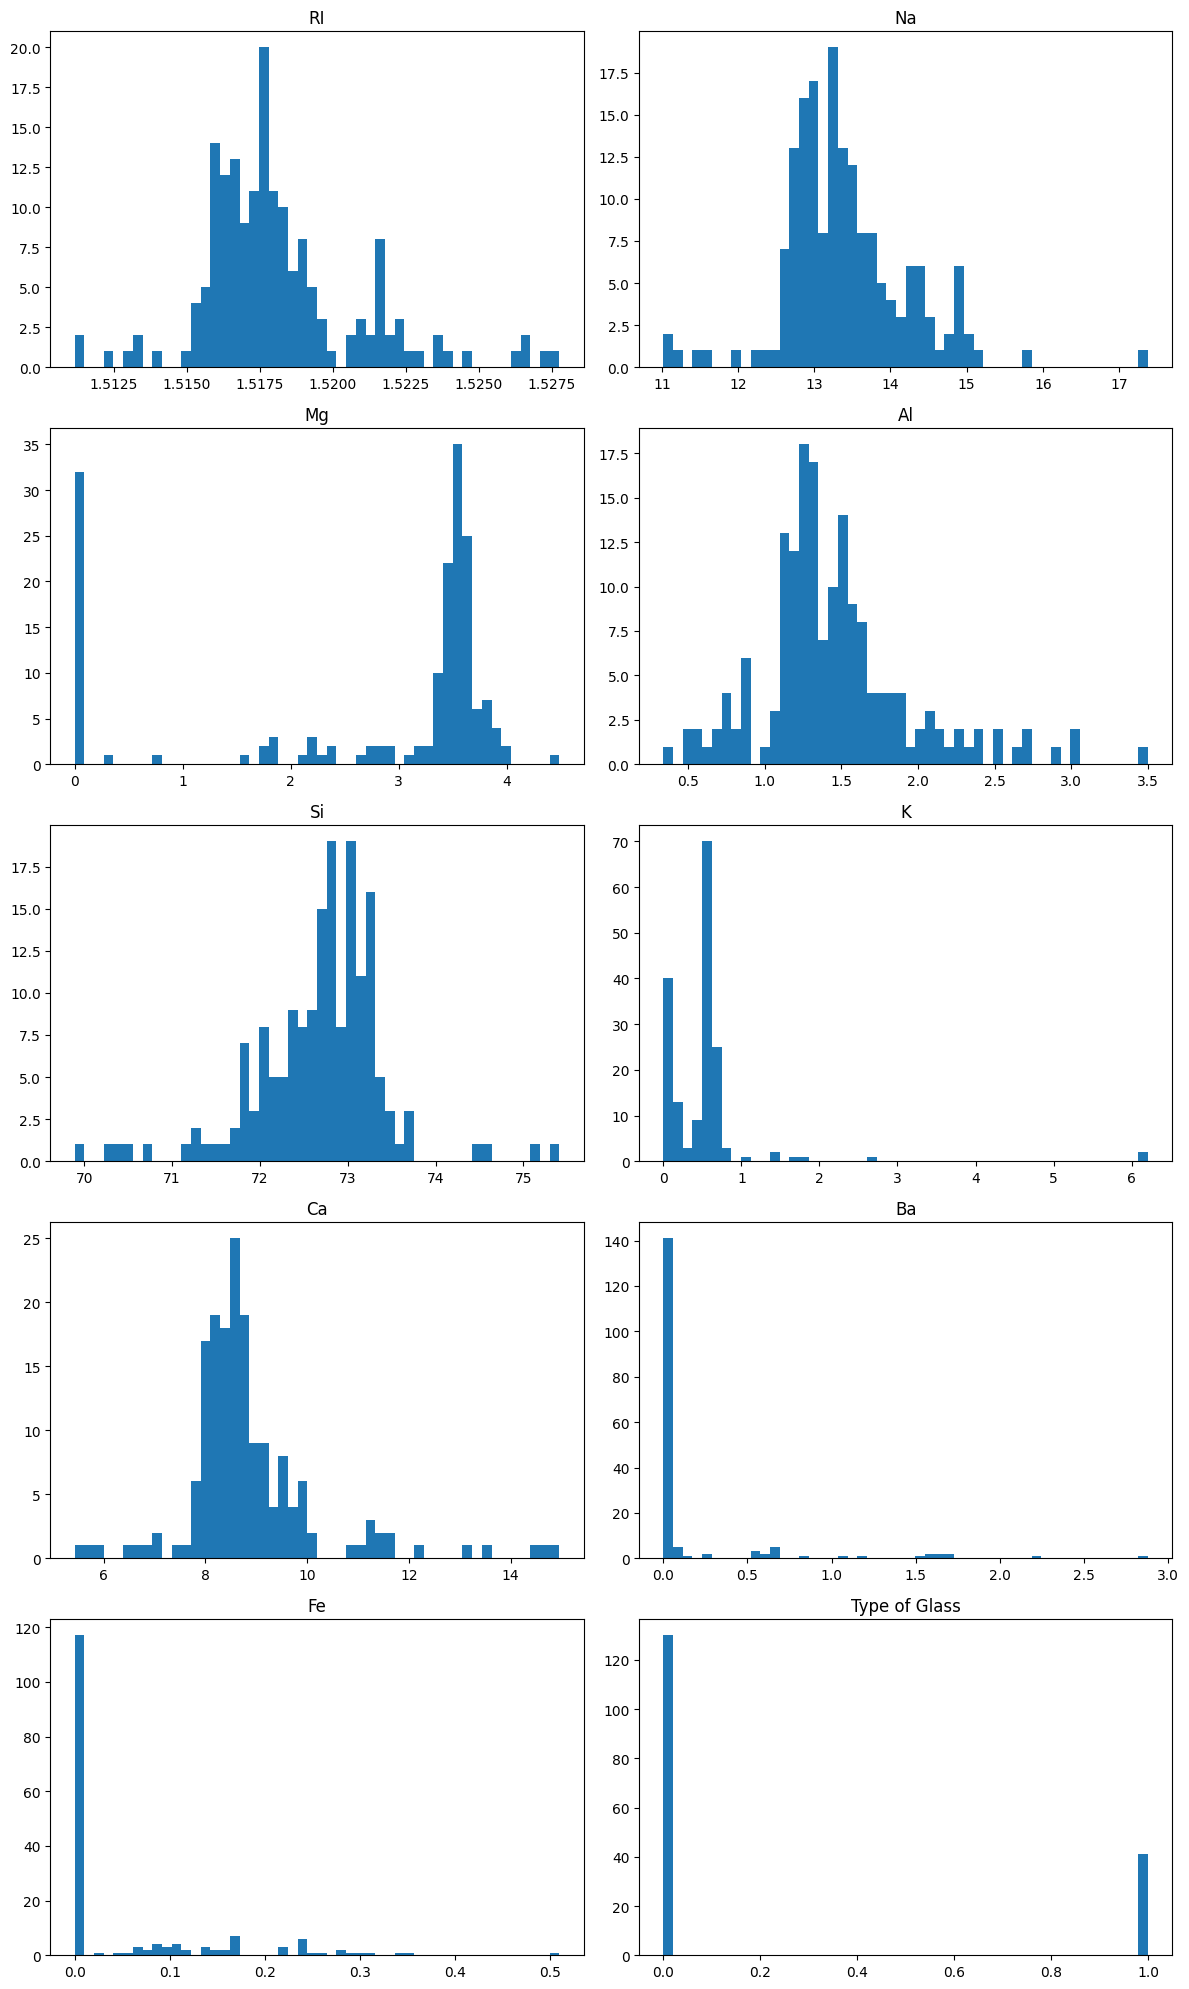

In [14]:
num_histograms = 10
num_cols = 2
num_rows = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(train.columns[:num_histograms]):
    axes[i].hist(train[col], bins=50)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Boxplots for Outlier Detection

There seem to be outliers in the data, infact it was evident in the "describe" method that we used earlier. When the difference between 75% and max is extremely high or the difference between min and 25% is extremely high it is mainly due to outliers.

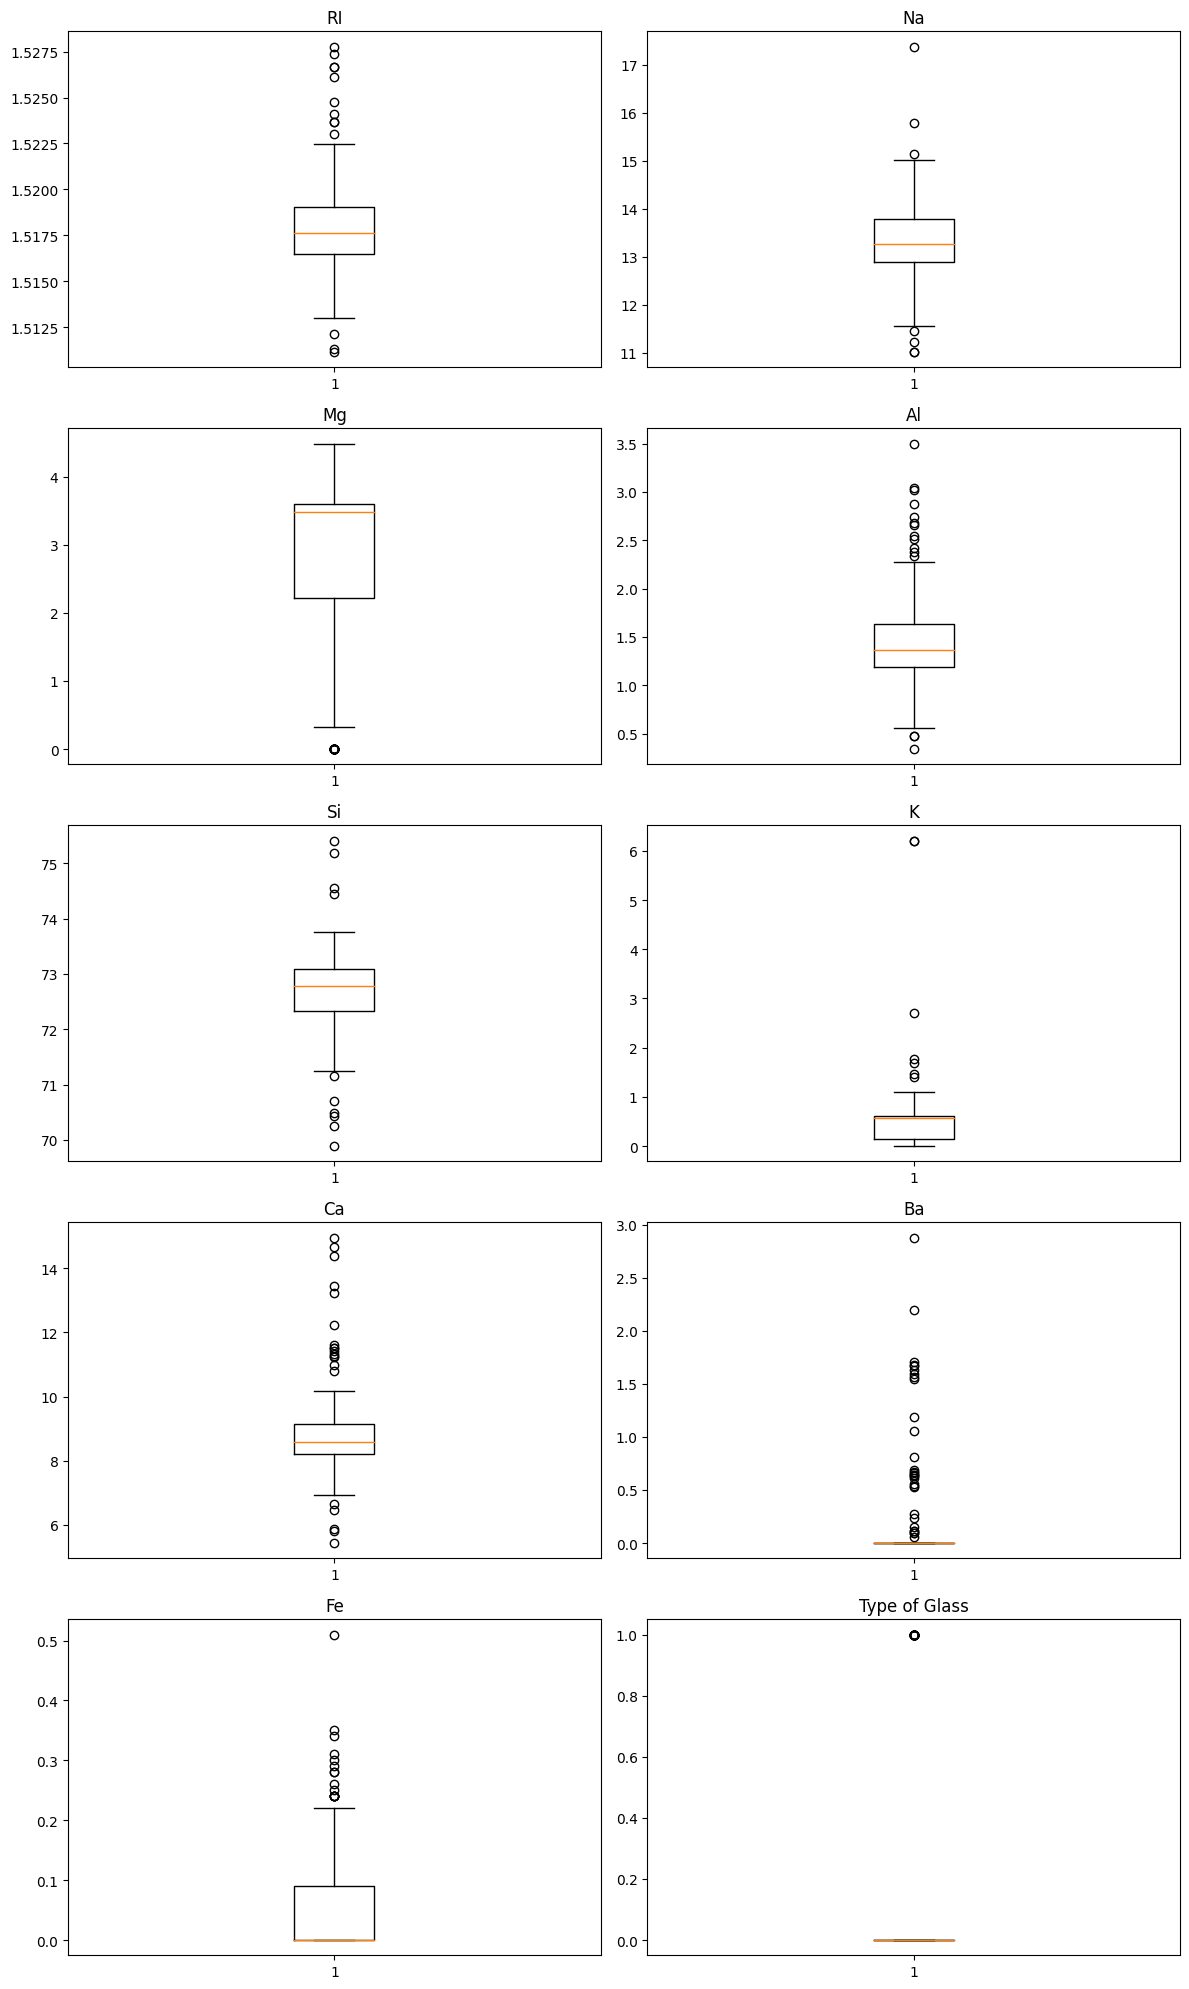

In [15]:
num_histograms = 10
num_cols = 2
num_rows = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(train.columns[:num_histograms]):
    axes[i].boxplot(train[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Bivariate Analysis

Bivariate Analysis usually helps us understand the relationships between the feature columns and the output columns.

Eg - The values for Mg are higher where the Type of Glass is Window Type where as the values are lower where the Type of Glass is Non-Window Type.

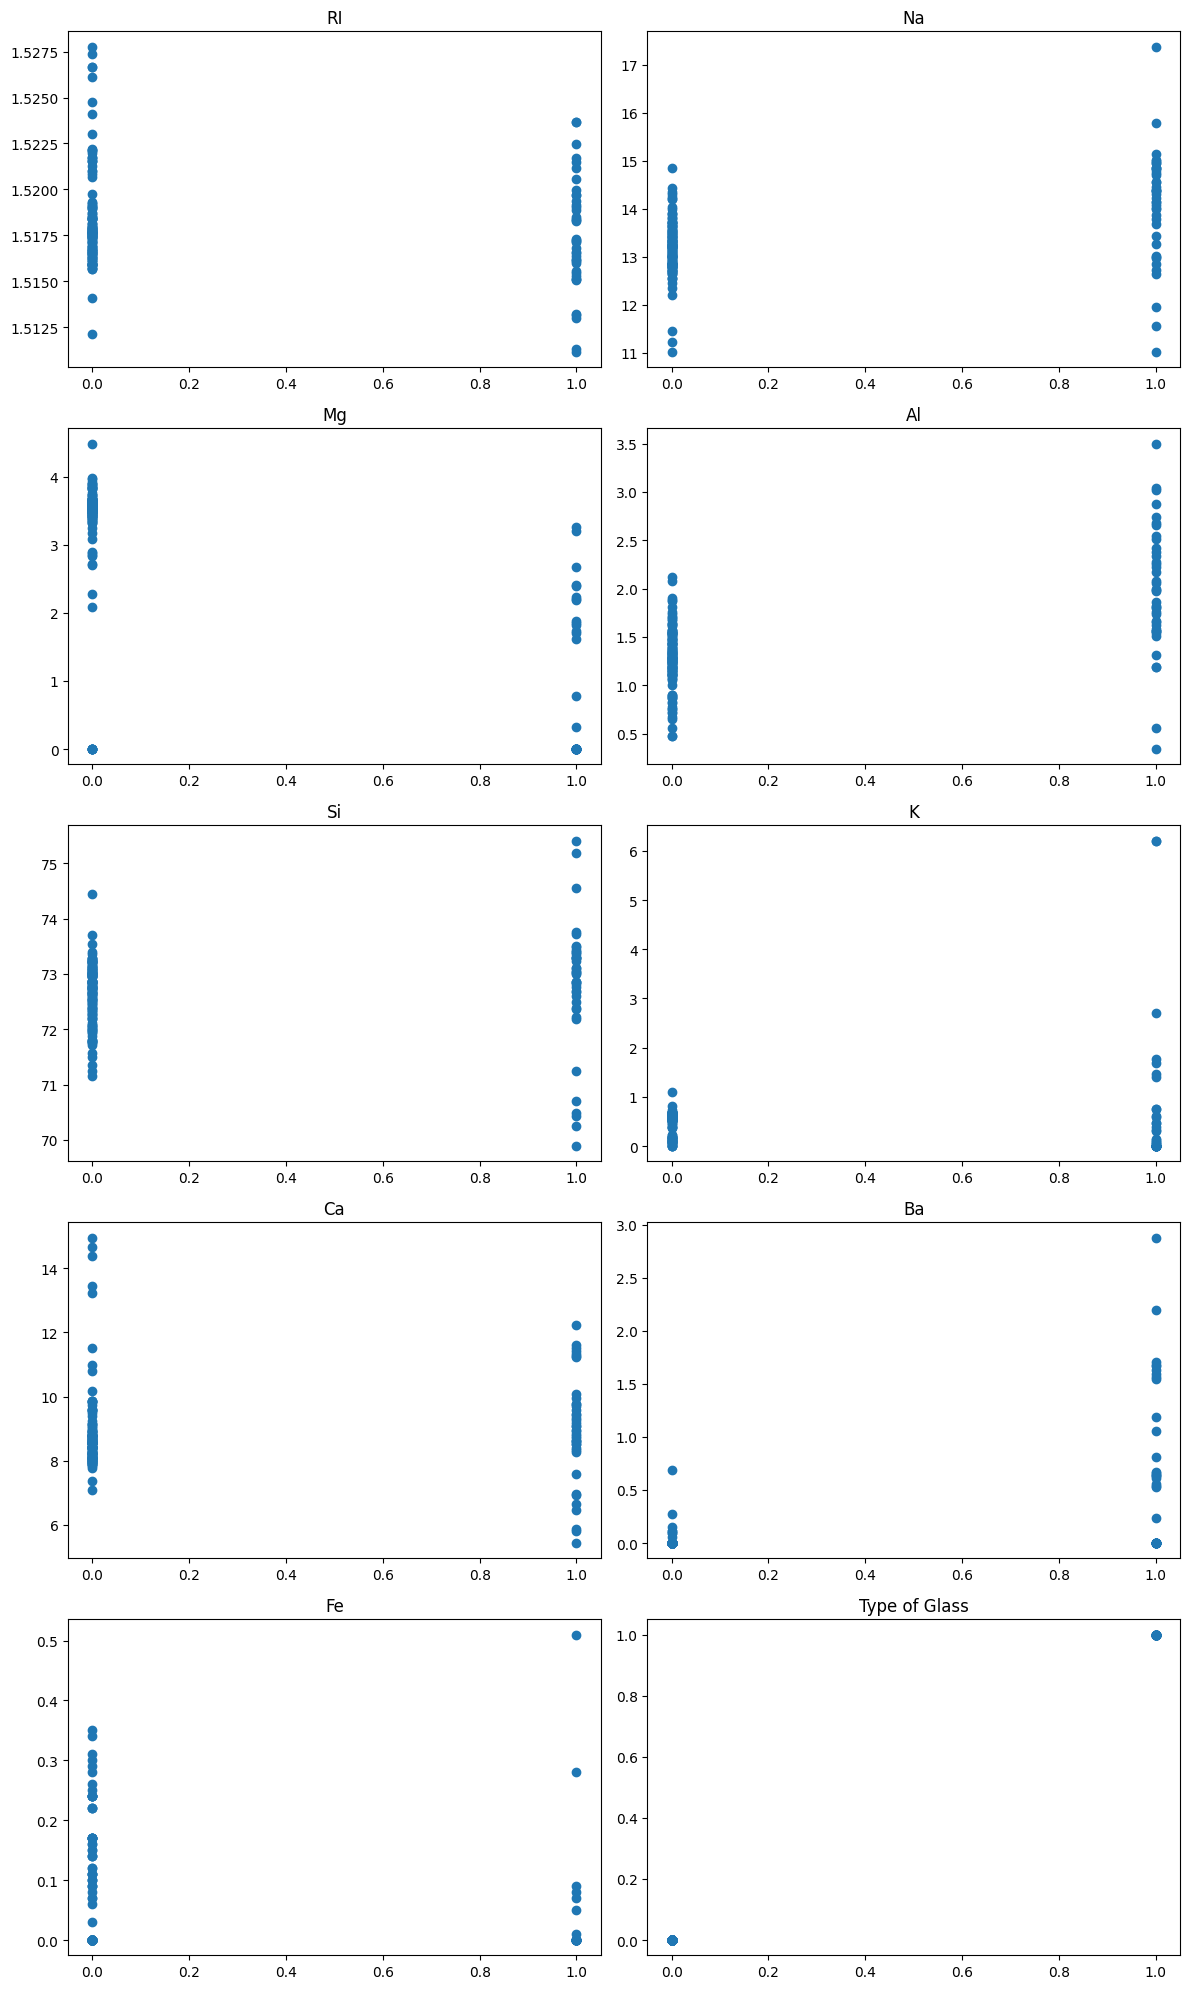

In [16]:
num_histograms = 10
num_cols = 2
num_rows = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(train.columns[:num_histograms]):
    axes[i].scatter(train['Type of Glass'], train[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Multivariate Analysis

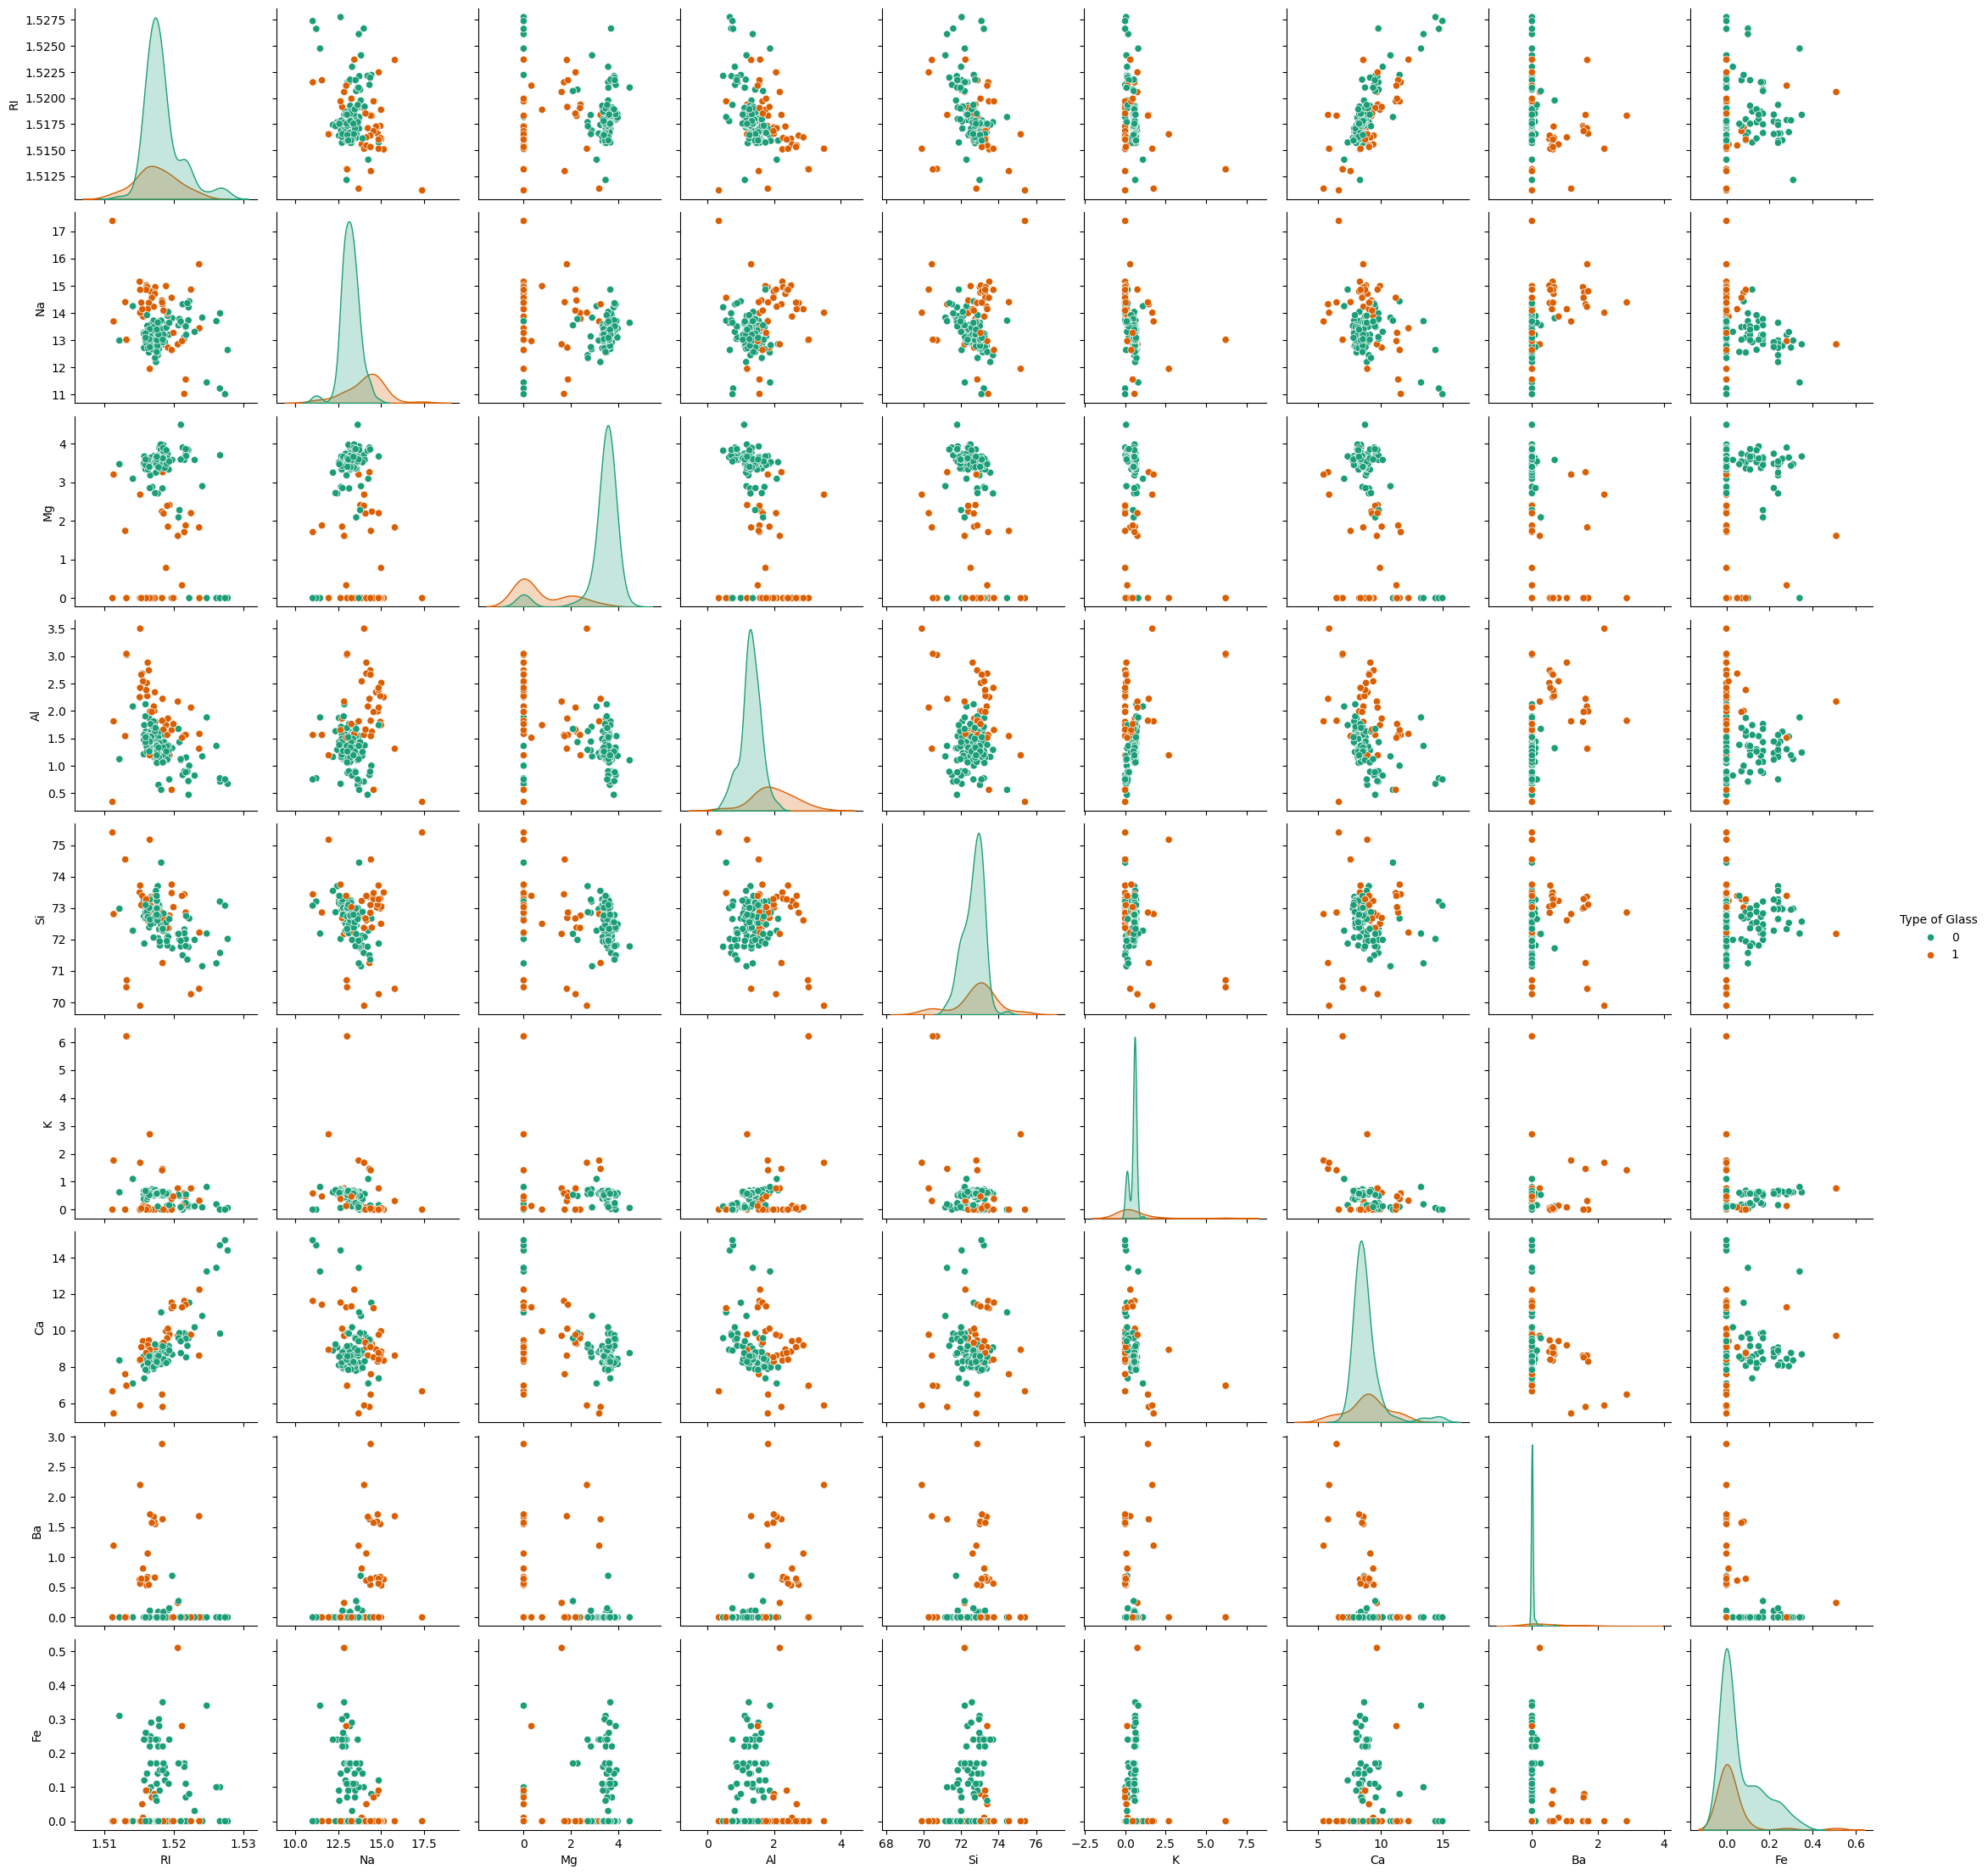

In [17]:
sns.pairplot(train, hue = 'Type of Glass', palette='Dark2')
plt.show()

## Correlations

In [18]:
train.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
RI,1.000000,-0.174863,-0.080256,-0.441354,-0.400149,-0.315254,0.792238,-0.130753,0.063706,-0.130266
Na,-0.174863,1.000000,-0.302606,0.194398,-0.142388,-0.243847,-0.281204,0.449905,-0.232078,0.454168
Mg,-0.080256,-0.302606,1.000000,-0.450024,-0.217578,-0.036389,-0.422182,-0.453017,0.095350,-0.767195
Al,-0.441354,0.194398,-0.450024,1.000000,-0.123064,0.359387,-0.296271,0.489453,-0.076450,0.587470
Si,-0.400149,-0.142388,-0.217578,-0.123064,1.000000,-0.261357,-0.023883,-0.088040,0.003151,0.086086
K,-0.315254,-0.243847,-0.036389,0.359387,-0.261357,1.000000,-0.339152,-0.007265,-0.005899,0.095797
Ca,0.792238,-0.281204,-0.422182,-0.296271,-0.023883,-0.339152,1.000000,-0.241951,0.078576,0.044345
Ba,-0.130753,0.449905,-0.453017,0.489453,-0.088040,-0.007265,-0.241951,1.000000,-0.116175,0.572138
Fe,0.063706,-0.232078,0.095350,-0.076450,0.003151,-0.005899,0.078576,-0.116175,1.000000,-0.165244
Type of Glass,-0.130266,0.454168,-0.767195,0.587470,0.086086,0.095797,0.044345,0.572138,-0.165244,1.000000


It is evident that Calcium and Refractive index seem to have an extremely high correlation value meaning. With the increase in the RI the Calcium content in the Glass also increases.

As per the matrix we can see that RI has a higher correlation with Type of Glass than Ca. But we will perform PCA to understand the explained variance ratio for each feature and accordingly remove the columns without losing much information. This is a very crucial step as the amount of instances we have are very few and hence we cannot afford to lose any further information.

Hence due to this reason we have also retained the outliers.

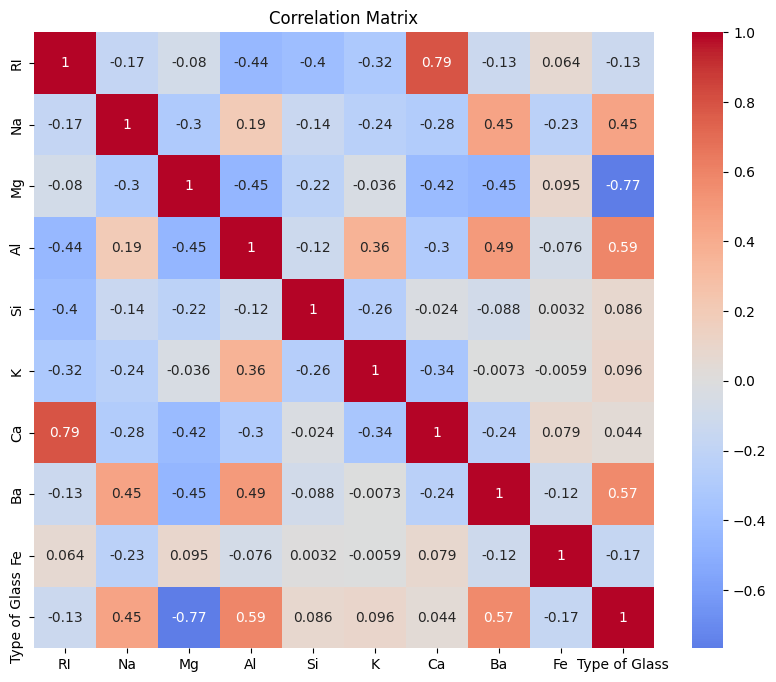

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Skewness

We will try to get rid of skewness of columns with extremely high skewness i.e > 2 or < -2

In [20]:
train.skew()

RI               1.014206
Na               0.677985
Mg              -1.224156
Al               1.071588
Si              -0.462340
K                6.159147
Ca               1.870976
Ba               3.460856
Fe               1.870197
Type of Glass    1.229879
dtype: float64

In [21]:
train['K'] = np.power(train['K'], 1/3)
test['K'] = np.power(test['K'], 1/3)

In [22]:
train['Ba'] = np.power(train['Ba'], 1/4)
test['Ba'] = np.power(test['Ba'], 1/4)

In [23]:
train.skew()

RI               1.014206
Na               0.677985
Mg              -1.224156
Al               1.071588
Si              -0.462340
K               -0.526094
Ca               1.870976
Ba               1.965539
Fe               1.870197
Type of Glass    1.229879
dtype: float64

## Splitting the Data into X and y

In [24]:
X_train = train.drop('Type of Glass', axis=1)
y_train = train['Type of Glass']

X_test = test.drop('Type of Glass', axis=1)
y_test = test['Type of Glass']

In [25]:
X_train.shape

(171, 9)

In [26]:
y_train.shape

(171,)

In [27]:
X_test.shape

(43, 9)

In [28]:
y_test.shape

(43,)

## Scaling the Data

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

## PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 7)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

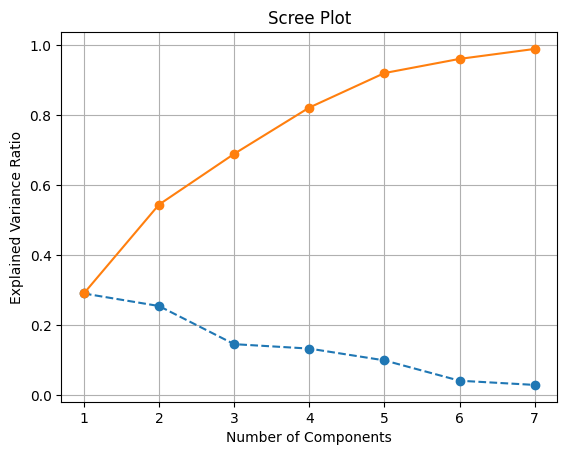

In [31]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [32]:
print(explained_variance_ratio_)

[0.28974766 0.25392266 0.14497518 0.13231189 0.09861148 0.04048704
 0.02848283]


In [33]:
print(cumulative_explained_variance)

[0.28974766 0.54367032 0.6886455  0.82095739 0.91956887 0.96005592
 0.98853875]


It is evident from this that even with the first 7 components we retain over 98% of the variance of the dataset.

Getting rid of these 2 components won't do us more harm. We can see that in the results.

## Models

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [35]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_scaled, y_train)
sgd_clf.score(test_scaled, y_test)

0.9302325581395349

In [36]:
lr = LogisticRegression(random_state=42)
lr.fit(train_scaled, y_train)
lr.score(test_scaled, y_test)

0.9534883720930233

In [37]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, y_train)
dt.score(test_scaled, y_test)

0.9534883720930233

In [38]:
rt = RandomForestClassifier(random_state=42)
rt.fit(train_scaled, y_train)
rt.score(test_scaled, y_test)

0.9302325581395349

In [39]:
svc_clf = SVC(random_state=42)
svc_clf.fit(train_scaled, y_train)
svc_clf.score(test_scaled, y_test)

0.9069767441860465

In [40]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_scaled, y_train)
knn_clf.score(test_scaled, y_test)

0.9534883720930233

## With PCA Models

In [41]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_pca, y_train)
sgd_clf.score(test_pca, y_test)

0.9069767441860465

In [42]:
lr = LogisticRegression(random_state=42)
lr.fit(train_pca, y_train)
lr.score(test_pca, y_test)

0.9534883720930233

In [43]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_pca, y_train)
dt.score(test_pca, y_test)

0.9534883720930233

In [44]:
rt = RandomForestClassifier(random_state=42)
rt.fit(train_pca, y_train)
rt.score(test_pca, y_test)

0.9767441860465116

In [45]:
svc_clf = SVC(random_state=42)
svc_clf.fit(train_pca, y_train)
svc_clf.score(test_pca, y_test)

0.9069767441860465

In [46]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_pca, y_train)
knn_clf.score(test_pca, y_test)

0.9534883720930233

## Confusion Matrix for Random Forest Classifier

Our Random Forest Model only got 1 incorrect Prediction !

In [47]:
from sklearn.metrics import confusion_matrix

y_pred = rt.predict(test_pca)
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[33  0]
 [ 1  9]]


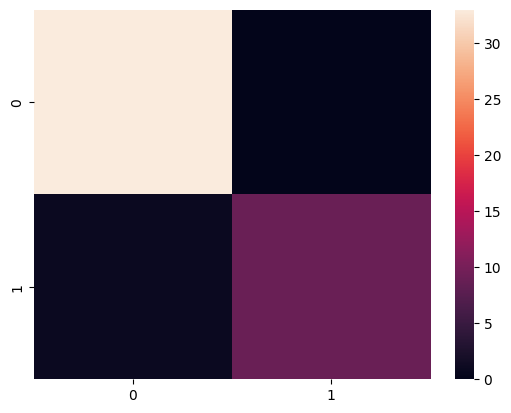

In [48]:
sns.heatmap(cm)
plt.show()

## Conclusion

We are able to achieve over 95% accuracy on the test set with Logistic Regression and KNeighborsClassifier and Descision Tree Classifier without the need of any Fine-Tuning when we did not use PCA.

With Principal Component Analysis we were able to achieve even a higher Test accuracy of over 97% on Random Forest Classifier.

Let us plot a bar graph for the same.

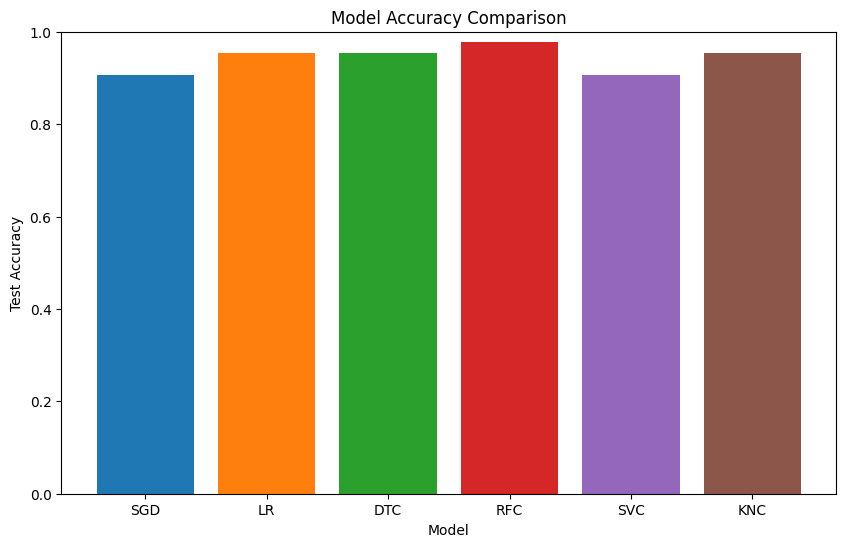

In [49]:
model_names = ['SGD', 'LR', 'DTC', 'RFC', 'SVC', 'KNC']
accuracy_scores = [0.9069767441860465, 0.9534883720930233, 0.9534883720930233, 0.9767441860465116, 0.9069767441860465, 0.9534883720930233 ]
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colours)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()